In [173]:
#from scipy.spatial import distance as dist
import numpy as np
from imutils.video import VideoStream
from imutils import face_utils
from threading import Thread
import numpy as np
#import playsound
import argparse
import imutils
import time
import dlib
import cv2
from matplotlib import pyplot as plt
import matplotlib.pyplot as plot

In [174]:
def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1]- eye[5])
    B = np.linalg.norm(eye[2]- eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

In [175]:
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 48
COUNTER = 0
ALARM_ON = False

In [176]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('E:\\CodePython\\Or_model.dat')

In [177]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

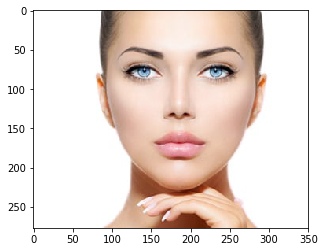

In [405]:
frame = cv2.imread('C:\\Users\\OrKatz\\Desktop\\Data\\car\\face.jpg')
frame1 = frame[:,:,[2,1,0]]
plt.imshow(frame1)
plt.show()
frame = imutils.resize(frame, width=450)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)

In [260]:
for rect in rects:
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    leftEye = shape[lStart:lEnd]
    rightEye = shape[rStart:rEnd]
    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)
    ear = (leftEAR + rightEAR) / 2.0
    leftEyeHull = cv2.convexHull(leftEye)
    rightEyeHull = cv2.convexHull(rightEye)
    cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
    cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
    if ear < EYE_AR_THRESH:
        COUNTER += 1
        if COUNTER >= EYE_AR_CONSEC_FRAMES:
            if not ALARM_ON:
                ALARM_ON = True
                if args["alarm"] != "":
                    t = Thread(target=sound_alarm,
                        args=(args["alarm"],))
                    t.deamon = True
                    t.start()
            cv2.putText(frame, "DROWSINESS ALERT!", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    else:
        COUNTER = 0
        ALARM_ON = False
        cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


In [264]:
for eye in leftEyeHull:
    for x,y in eye:
        if x.max() > Xmax:
            Xmax = x.max()
        if Xmin > x.min():
            Xmin = x.min()
        if y.max() > Ymax:
            Ymax = y.max()
        if Ymin > y.min():
            Ymin = y.min()
Ymin,Ymax,Xmin,Xmax

(95, 111, 275, 320)

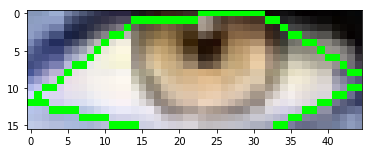

95

In [267]:
newfa = frame[Ymin:Ymax,Xmin:Xmax]
plt.imshow(newfa)
plt.show()
Ymin

In [241]:
Corner = newfa.copy()

In [242]:
eyeEnd = newfa.copy()

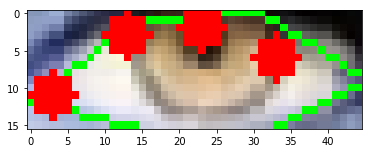

In [243]:
gray = cv2.cvtColor(newfa,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(Corner,(x,y),3,255,-1)
plt.imshow(Corner)
plt.show()

In [244]:
from PIL import Image
img = Image.fromarray(newfa)
pixels = img.load()
xlist = []
ylist = []
for y in range(img.size[1]):
    for x in range(img.size[0]):
        if pixels[x, y] == 0:
            xlist.append(x)
            ylist.append(y)

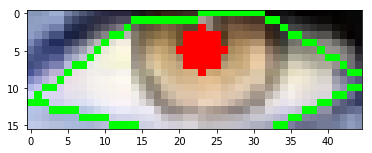

In [246]:
eyeEnd2 = eyeEnd[ytop:ybot,xleft:xright]
cv2.circle(eyeEnd,(xlist,ylist),3,255,-1)
plt.imshow(eyeEnd)
plt.show()

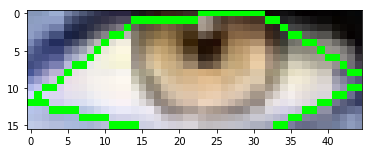

In [386]:
plt.imshow(newfa)
plt.show()

In [397]:
def HiPassFileter(img):
    mean_filter = np.ones((3,3))
    x = cv2.getGaussianKernel(5,10)
    gaussian = x*x.T
    # different edge detecting filters
    # scharr in x-direction
    scharr = np.array([[-3, 0, 3],
                       [-10,0,10],
                       [-3, 0, 3]])
    # sobel in x direction
    sobel_x= np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
    # sobel in y direction
    sobel_y= np.array([[-1,-2,-1],
                       [0, 0, 0],
                       [1, 2, 1]])
    # laplacian
    laplacian=np.array([[0, 1, 0],
                        [1,-4, 1],
                        [0, 1, 0]])
    filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
    filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
    fft_filters = [np.fft.fft2(x) for x in filters]
    fft_shift = [np.fft.fftshift(y) for y in fft_filters]
    mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
        plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
    plt.show()
    for i in range(6):
        plt.subplot(2,3,i+1)
        dst = Convolution2D(img,filters[i])
        plt.imshow(dst)
        plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
    plt.show()

In [391]:
def Convolution2D(img,filter2D):
    dst = cv2.filter2D(img,-1,filter2D)
    return dst

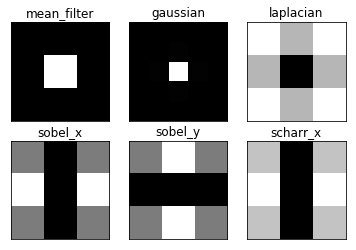

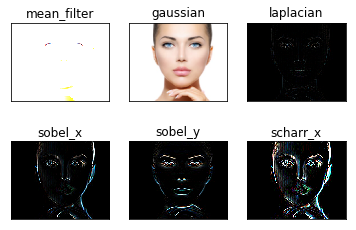

In [407]:
HiPassFileter(frame[:,:,[2,1,0]])

In [414]:
    x = cv2.getGaussianKernel(5,10)
    gaussian = x*x.T

In [432]:
circles = cv2.HoughCircles(newfa[:,:,1], cv2.HOUGH_GRADIENT, 1.2, 100)
print (circles)

None


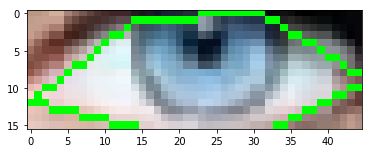

In [427]:
plt.imshow(newfa[:,:,[2,1,0]])
plt.show()

In [530]:
c = np.array(frame)

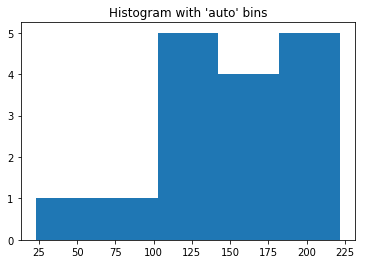

In [559]:
plt.hist(gray[:,17], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [518]:
np.histogram(c[:,2,1])

(array([3, 1, 1, 0, 4, 1, 3, 1, 0, 2], dtype=int64),
 array([  67. ,   85.8,  104.6,  123.4,  142.2,  161. ,  179.8,  198.6,
         217.4,  236.2,  255. ]))

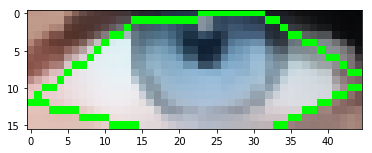

In [501]:
blur = cv2.bilateralFilter(newfa[:,:,[2,1,0]],9,75,75)
plt.imshow(blur)
plt.show()

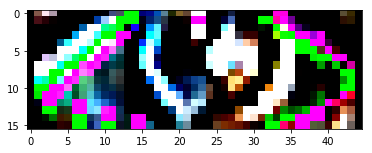

In [438]:
dst = Convolution2D(newfa[:,:,[2,1,0]],scharr)
plt.imshow(dst)
plt.show()

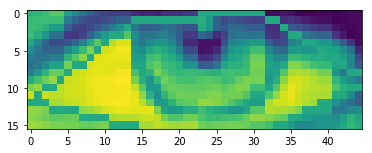

In [548]:
gray = cv2.cvtColor(newfa, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

In [380]:
output = newfa.copy()

In [385]:
import cv2
import numpy as np
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 0.001, 10,
               param1=20,
               param2=10,
               minRadius=80,
               maxRadius=150)

print (circles)

None


In [378]:
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
 
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
 
	# show the output image
	cv2.imshow("output", np.hstack([frame, output]))
	cv2.waitKey(0)